# Basic simplest version
In this file, using tf-idf with SVM abd Naive Bayes.  Comparing 50/50 80/20 90/10 data splits.

Working with nltk version 3.2.5 and scikit-learn version 0.20.1.

In [1]:
import nltk
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split

verbose = True

In [2]:
# for feature extraction
from sklearn.feature_extraction.text import CountVectorizer
# tf-idf
from sklearn.feature_extraction.text import TfidfTransformer
# SVM
from sklearn.linear_model import SGDClassifier
# NB
from sklearn.naive_bayes import MultinomialNB
# pipeline
from sklearn.pipeline import Pipeline
# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Support Vector Machine

In [3]:
# # step by step reference, no pipeline

# # count words
# count_vect = CountVectorizer()
# X_train_count = count_vect.fit_transform(X_train.text)
# X_train_count.shape

# # tf-idf
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)
# X_train_tfidf.shape

# # NB
# clf = MultinomialNB().fit(X_train_tfidf, X_train.author)

## Pipeline
Using pipelines to help speed things up

In [4]:
svm_clf = Pipeline([("vect", CountVectorizer()),
                        ("tfidf", TfidfTransformer()),
                        ("clf-svm", SGDClassifier(loss = "hinge", penalty = "l2",
                                                tol = 1e-3, 
                                                random_state = 42)),])


### Multinomial NB

In [5]:
nb_clf = Pipeline([("vect", CountVectorizer()),
                    ("tfidf", TfidfTransformer()),
                    ("clf- nb", MultinomialNB(),)])


### Random Forest

In [6]:
rf_clf = Pipeline([("vect", CountVectorizer()),
                    ("tfidf", TfidfTransformer()),
                    ("clf-rf", RandomForestClassifier(random_state = 42, n_estimators = 10),)])

## Automate pipelines
Create lists and a dictionary to help iterate through the fit and predict parts. 

In [7]:
pipelines = [svm_clf, nb_clf, rf_clf]
pipe_dict = {0: "Support Vector Machine", 1: "Naive Bayes", 2: "Random Forest"}

Extracting features, using bag of words model. 

In [8]:
dataPath = os.path.join(os.getcwd(), "data", "")
train = pd.read_csv(dataPath + "train.csv")
if(verbose):
    print(train.head(5))


        id                                               text author
0  id26305  This process, however, afforded me no means of...    EAP
1  id17569  It never once occurred to me that the fumbling...    HPL
2  id11008  In his left hand was a gold snuff box, from wh...    EAP
3  id27763  How lovely is spring As we looked from Windsor...    MWS
4  id12958  Finding nothing else, not even gold, the Super...    HPL


## Split data

In [9]:
X50_train, X50_test, y50_train, y50_test = train_test_split(train.text, train.author, test_size = .50)
X80_train, X80_test, y20_train, y20_test = train_test_split(train.text, train.author, test_size = .20) 
X90_train, X90_test, y10_train, y10_test = train_test_split(train.text, train.author, test_size = .10)

if(verbose):
    print("\nShape of X50_train ", X50_train.shape)
    print("Shape of y50_train ", y50_train.shape)
    print("Shape of X50_test ", X50_test.shape)
    print("Shape of y50_test ", y50_test.shape)
    
    print("\nShape of X80_train ", X80_train.shape)
    print("Shape of y20_train ", y20_train.shape)
    print("Shape of X80_test ", X80_test.shape)
    print("Shape of y20_test ", y20_test.shape)
    
    print("\nShape of X90_train ", X90_train.shape)
    print("Shape of y10_train ", y10_train.shape)
    print("Shape of X90_train ", X90_train.shape)
    print("Shape of y10_train ", y10_train.shape)



Shape of X50_train  (9789,)
Shape of y50_train  (9789,)
Shape of X50_test  (9790,)
Shape of y50_test  (9790,)

Shape of X80_train  (15663,)
Shape of y20_train  (15663,)
Shape of X80_test  (3916,)
Shape of y20_test  (3916,)

Shape of X90_train  (17621,)
Shape of y10_train  (17621,)
Shape of X90_train  (17621,)
Shape of y10_train  (17621,)


In [10]:
X_train = []
y_train = []
X_test = []
y_test = []

X_train.append(X50_train)
y_train.append(y50_train)
X_test.append(X50_test)
y_test.append(y50_test)
    
X_train.append(X80_train)
y_train.append(y20_train)
X_test.append(X80_test)
y_test.append(y20_test)
    
X_train.append(X90_train)
y_train.append(y10_train)
X_test.append(X90_train)
y_test.append(y10_train)

train_dict = {0: "50/50", 1: "80/20", 2: "90/10"}

In [11]:
accuracy = {}

In [12]:
for i, item in enumerate(X_train):
    
    print("\nLooking at",  train_dict[i], "split")
    accuracy[train_dict[i]] = {}
    for idx, pl in enumerate(pipelines):
        print("\nEstimator:",  pipe_dict[idx])
        pl.fit(X_train[i], y_train[i])
        y_pred = pl.predict(X_test[i])
        print('Test set accuracy score: %.3f ' % accuracy_score(y_test[i], y_pred))
        accuracy[train_dict[i]][pipe_dict[idx]] = accuracy_score(y_test[i], y_pred)
        # end inner for over pipeline
    #end outer for over data


Looking into 50/50 split

Estimator: Support Vector Machine
Test set accuracy score: 0.811 

Estimator: Naive Bayes
Test set accuracy score: 0.788 

Estimator: Random Forest
Test set accuracy score: 0.591 

Looking into 80/20 split

Estimator: Support Vector Machine
Test set accuracy score: 0.828 

Estimator: Naive Bayes
Test set accuracy score: 0.813 

Estimator: Random Forest
Test set accuracy score: 0.621 

Looking into 90/10 split

Estimator: Support Vector Machine
Test set accuracy score: 0.928 

Estimator: Naive Bayes
Test set accuracy score: 0.903 

Estimator: Random Forest
Test set accuracy score: 0.989 


In [13]:
accuracy = pd.DataFrame.from_dict(accuracy)
accuracy

,50/50,80/20,90/10
Naive Bayes,0.788253,0.812564,0.903127
Random Forest,0.590909,0.621042,0.988593
Support Vector Machine,0.811440,0.827886,0.927813


# Plots 

(3916,)
(3916,)


IndexError: too many indices for array

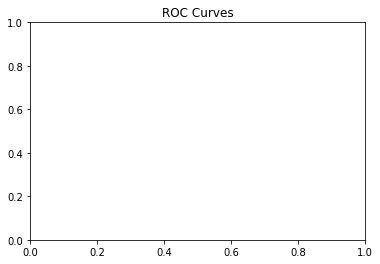

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import scikitplot as skplt

predicted = pipelines[2].predict(X_test[1])
expected = y_test[1]
print(predicted.shape)
print(expected.shape)
skplt.metrics.plot_roc(expected, predicted)
plt.show()

## Reference
Check nltk and sklearn versions: https://stackoverflow.com/questions/28501072/how-to-check-which-version-of-nltk-scikit-learn-installed
Pipeline help: https://www.kdnuggets.com/2017/12/managing-machine-learning-workflows-scikit-learn-pipelines-part-1.html